### Multiple Linear Regression Exercise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('forestfires.csv')

In [3]:
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


Problem Statement: It is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

In [4]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
data.duplicated().sum()

4

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(513, 13)

In [9]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [10]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [11]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [12]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

month_mapping = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
    }

day_mapping = {
    'sun': 0,
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    }

data['month'] = data['month'].map(month_mapping)
data['day'] = data['day'].map(day_mapping)

Observation: Month and Day are oridinal data so i used the ordinal encoding accordingly.

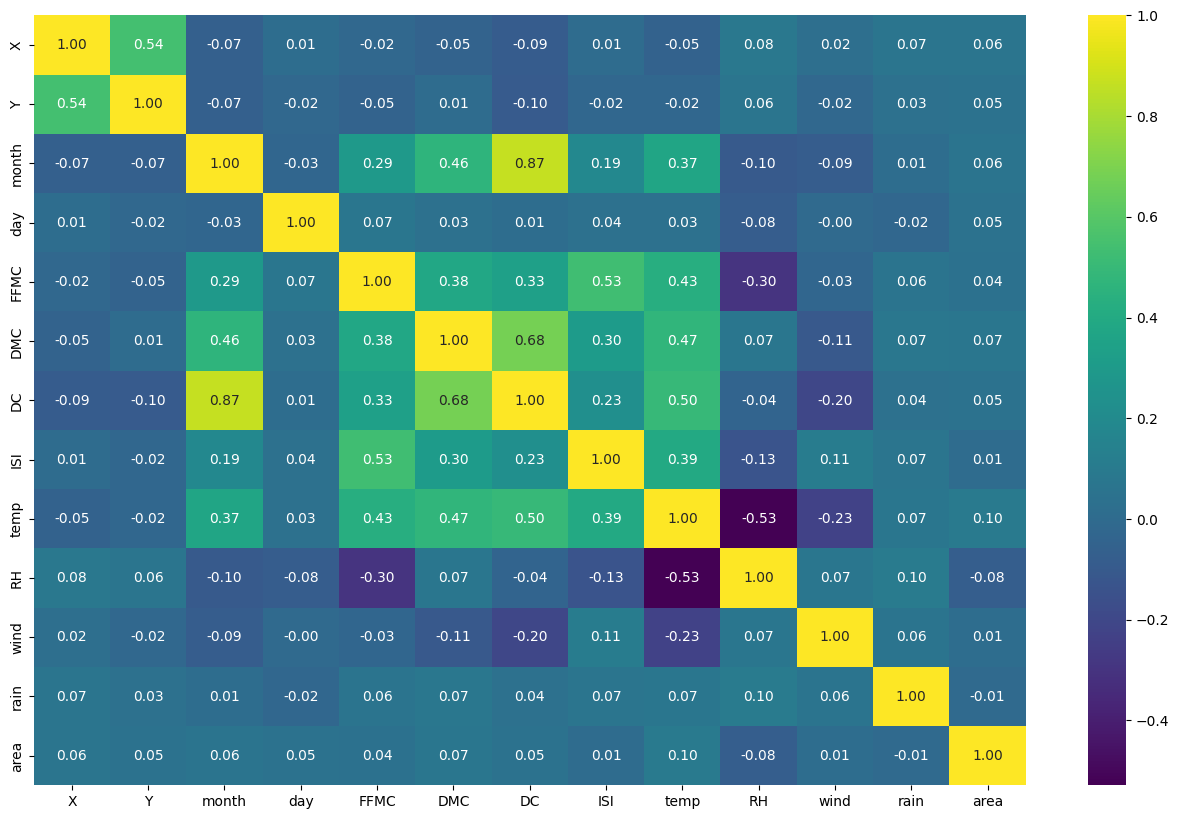

In [17]:
corr = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.xticks()
plt.yticks()
plt.show()

Observation: The highest correlation coefficient of 0.87 is present between DC and month. The next highest is 0.68 between DC and DMC.

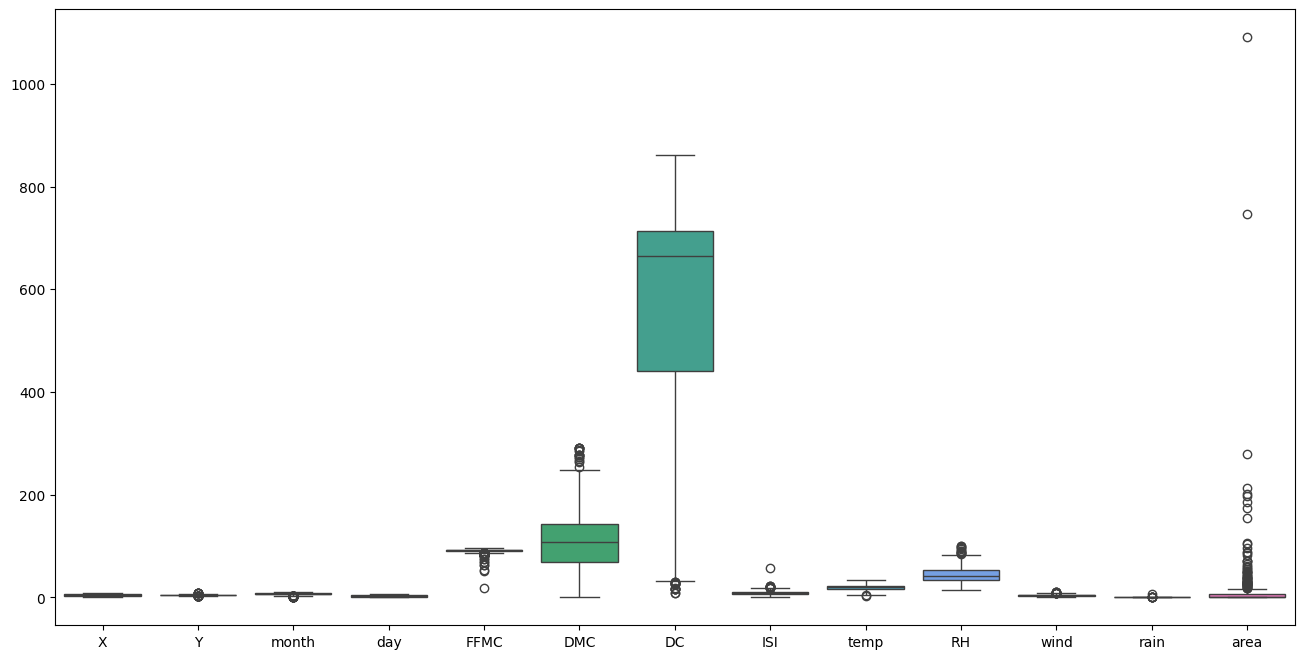

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)
plt.show()

Observation: There are outliers so i will use robustscaling for feature scaling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = data.drop('area', axis=1)
Y = data['area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

numerical_cols = X.select_dtypes(include=['number']).columns

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

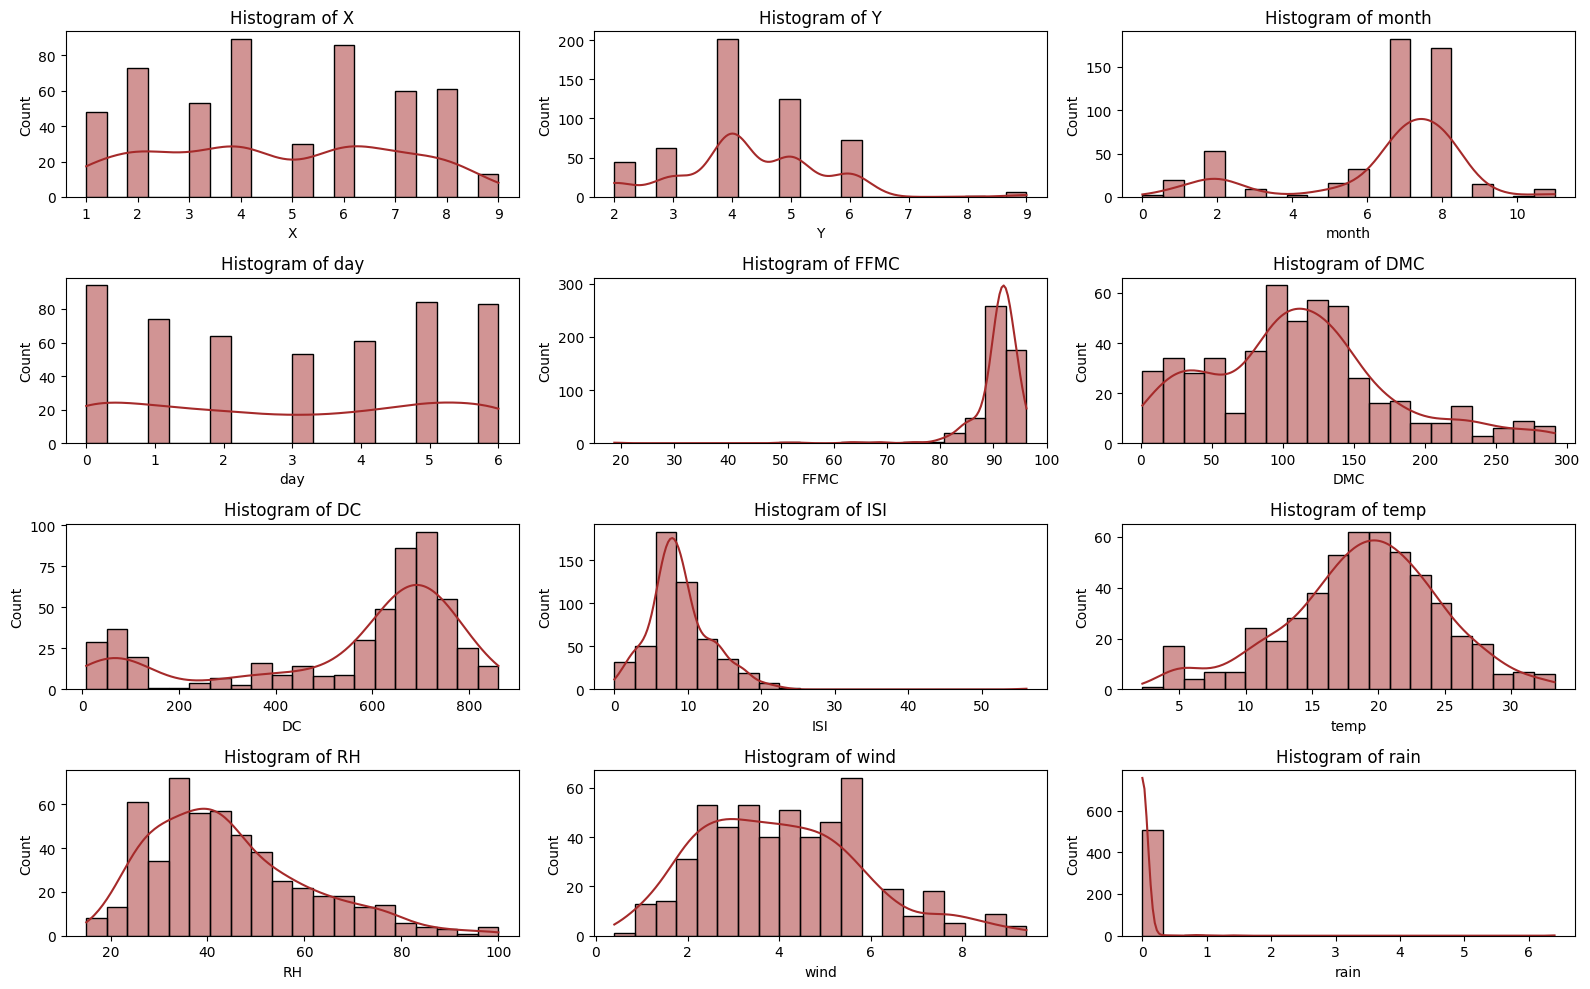

In [22]:
plt.figure(figsize=(16,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], kde=True, bins=20, color='brown')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()